# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [230]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import copy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve,recall_score
from sklearn.utils._bunch import Bunch
# Metrics to evaluate the model
from sklearn import metrics
from sklearn import tree
from sklearn.compose import ColumnTransformer

# For tuning the model
from sklearn.model_selection import GridSearchCV

# Data Overview

- Observations
- Sanity checks

In [231]:
# initialize a dataframe from the csv data
df = pd.read_csv('Data/ExtraaLearn.csv')

In [232]:
# initial inspection of the data
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [233]:
# look at the columns and datatypes for each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [234]:
# function to inspect the data types, variables and number of entries in each column

def inspect_variable_values(data: pd.DataFrame):
    
    # iterate through each column
    for i, col in enumerate(data.columns):
        
        # get a pandas series of the values in each column
        vals: np.ndarray = data[col].unique()
        
        # get the data type of the variables
        data_type = vals.dtype
        
        # print the column name
        print(f'{i + 1}. {col} \n')
        
        # print the columns data type
        print(f'Data type: {data_type}')
        
        # print the number of values the variable takes on
        print("Number of values:", len(vals))
        
        # print the values inside the column
        
        # if the variable takes on < 20 vals, print all the values
        if len(vals) < 20: 
            print("Values taken on by the variable:",vals)
        else:
            # otherwise, if the variable takes on > 20 values and is numeric, then print the range of values the variable takes on
            if isinstance(data_type, (np.dtypes.Int64DType, np.dtypes.Float64DType)):
                print("Values taken on by the variable:",f"Range: {vals.min()} - {vals.max()}")
            else:
                # otherwise the values are categorical, then print only the first 20 values
                print("Values taken on by the variable:", vals[:20])
        
        # new line between columns        
        print()

In [235]:
# call to the inspection function 
inspect_variable_values(df)

1. ID 

Data type: object
Number of values: 4612
Values taken on by the variable: ['EXT001' 'EXT002' 'EXT003' 'EXT004' 'EXT005' 'EXT006' 'EXT007' 'EXT008'
 'EXT009' 'EXT010' 'EXT011' 'EXT012' 'EXT013' 'EXT014' 'EXT015' 'EXT016'
 'EXT017' 'EXT018' 'EXT019' 'EXT020']

2. age 

Data type: int64
Number of values: 46
Values taken on by the variable: Range: 18 - 63

3. current_occupation 

Data type: object
Number of values: 3
Values taken on by the variable: ['Unemployed' 'Professional' 'Student']

4. first_interaction 

Data type: object
Number of values: 2
Values taken on by the variable: ['Website' 'Mobile App']

5. profile_completed 

Data type: object
Number of values: 3
Values taken on by the variable: ['High' 'Medium' 'Low']

6. website_visits 

Data type: int64
Number of values: 27
Values taken on by the variable: Range: 0 - 30

7. time_spent_on_website 

Data type: int64
Number of values: 1623
Values taken on by the variable: Range: 0 - 2537

8. page_views_per_visit 

Data type: fl

### Observations:

The data consists of 15 columns (variables). None of the columns contain null values. 

The set of features consist of the following numerical, categorical and binary variables:

Numerical Variables:

1. Age, an integer ranging from 18 to 63.
2. Number of Website visits, an integer ranging form 0 to 30.
3. Time spent on the website, an integer (indicating seconds) ranging from 0 to 2537.
4. Page views per visit, a floating point number.

Categorical Variables:

1. Current Occupation, Values: Unemployed, Professional, Student
2. First Interaction, Values: Website, Mobile App
3. Percentage Profile Completed, Values: High, Medium, Low
4. Last Activity, Values: Website Activity, Email Activity, Phone Activity

Binary Variables:

1. Print Media Type 1
2. Print Media Type 2
3. Digital Media
4. Educational Channels
5. Referral

The Target or Response variable is the binary 'status' variable. Which indicates whether the lead was converted to a paying customer or not.

The ID variable is unique to each lead and is therefore irrelevant to the analysis. 

# Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [236]:
# first drop the irrelevant column (id)
df = df.drop(columns = 'ID')

In [237]:
# check that the column has been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   int64  
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   int64  
 5   time_spent_on_website  4612 non-null   int64  
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   print_media_type1      4612 non-null   object 
 9   print_media_type2      4612 non-null   object 
 10  digital_media          4612 non-null   object 
 11  educational_channels   4612 non-null   object 
 12  referral               4612 non-null   object 
 13  status                 4612 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 504.6+ 

In [238]:
# list of column names for numerical variables
numerical_vars: list = []

# list of column names for categorical variables
categorical_vars: list = []

# list of column names for binary variables
binary_vars: list = []

In [239]:
# loop through the data and add the column name to the appropriate list
for col in df: 
    vals = df[col].to_numpy()
    data_type = vals.dtype
    
    if isinstance(data_type, (np.dtypes.Int64DType, np.dtypes.Float64DType)) and len(vals) > 2:
        numerical_vars.append(col)
    elif np.isin("Yes", vals):
        binary_vars.append(col)
    else:
        categorical_vars.append(col)

In [240]:
# check that the lists are correct
numerical_vars.remove("status")
print("Numerical Variables: ",numerical_vars)
print("Categorical Variables: ",categorical_vars)
print("Binary Variables: ",binary_vars)

Numerical Variables:  ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']
Categorical Variables:  ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity']
Binary Variables:  ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']


## Analyze categorical variables

In [241]:
# analyze the categorical variables using countplots
def analyze_categorical(cat_df: pd.DataFrame):
    
    plots = list()
    
    # loop through each column and create a countplot
    for i, col in enumerate(cat_df.columns):
        print(f"{i + 1}. Analysis for {col}:", '\n')
        plt.figure(figsize=(10, 5))
        sns.countplot(x=cat_df[col])
        plt.title(f"{col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()
        print(cat_df[col].value_counts(normalize=True), "\n")
        

1. Analysis for current_occupation: 


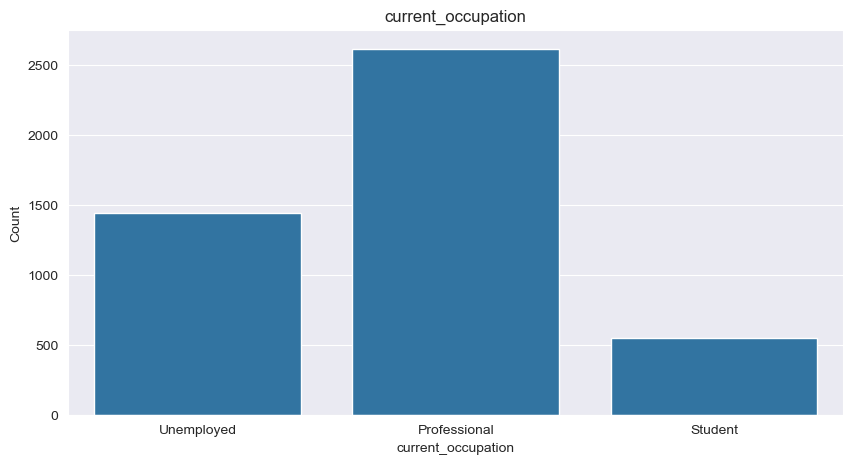

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64 

2. Analysis for first_interaction: 


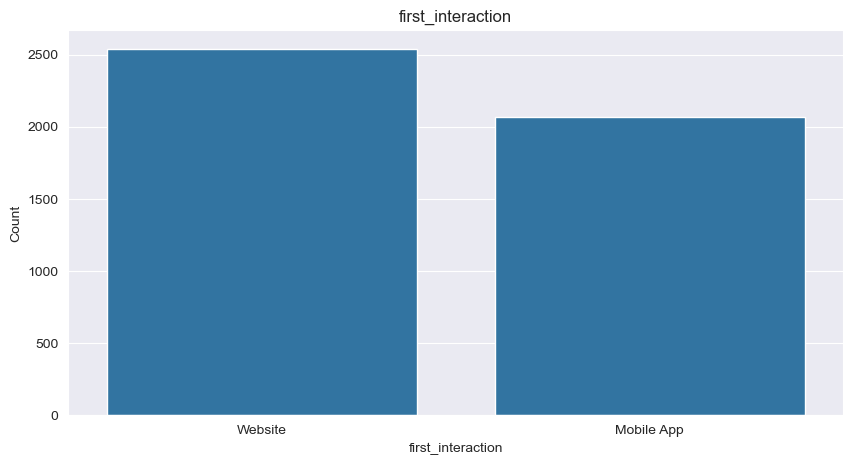

first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64 

3. Analysis for profile_completed: 


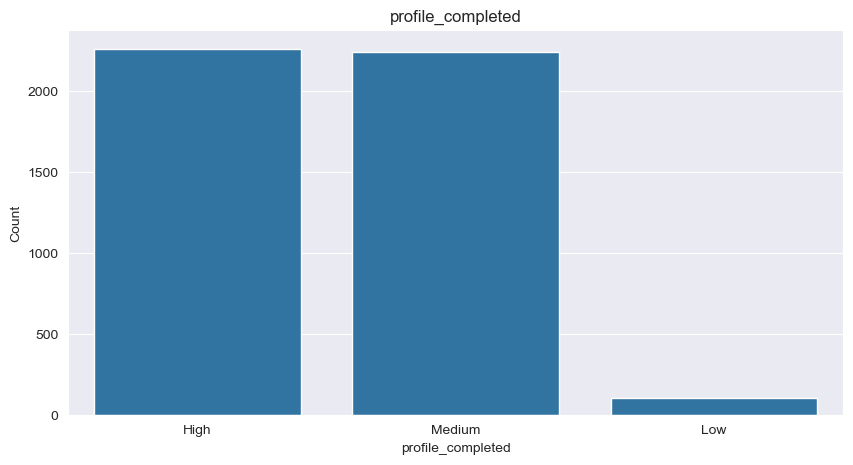

profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64 

4. Analysis for last_activity: 


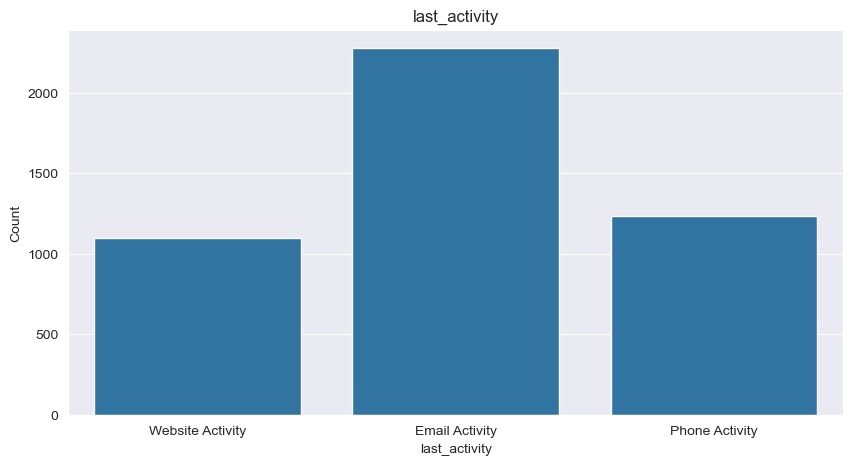

last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64 


In [242]:
# call the function
analyze_categorical(df[categorical_vars])

## Observations

1. Current Occupation: The majority of leads (56%) are Professionals. Followed by 31% unemployed and 12% students. 
2. First Interaction :Most (55%) of leads engage with the product through website, with the remainder (45%) initially engaging with the product through the mobile app. 
3. Profile Completed: The leads are almost equally distributed amongst the people having a "High" and "Medium" profile completed, with "Low" profile completion effectively negligible.
4. Last Activity: Almost 50% of leads (49%) had their last activity via email. The remaining leads last engaged with the product over Phone or Website, with roughly equal distribution of 27% and 24% respectively. 

## Analyze Numerical Variables

In [243]:
# view summary statistics of numerical variables
df[numerical_vars].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434


In [244]:
# function to create histograms and boxplots for each variable
def analyze_numerical(numeric_cols: list, bivariate=False): 
    
    # view summary statistics of numerical variables
    if not bivariate:
        summary_data = df[numerical_vars].describe().T
    else:
        summary_data: list = [df.loc[df['status'] == i , numerical_vars].describe() for i in range(2)]
    
    # loop through the columns of the dataframe
    for col in numeric_cols:
        
        # initialize a figure
        fig = plt.figure(figsize=(10, 3))
        
        plt.suptitle(f"{col}")
        
        # add subplots to the figure
        ax_1 = fig.add_subplot(1, 2, 1)
        ax_2 = fig.add_subplot(1, 2, 2)
        
        if bivariate:
            
            # create the histogram and add it to the first ax
            sns.histplot(data=df, x=col, ax=ax_1, kde=True, stat='proportion', hue='status')
            
            # create the boxplot and add it to the second ax
            sns.boxplot(data=df, x=col, ax=ax_2, showmeans=True, hue='status')
            
            # display the plot
            plt.show()
            
            # concatenate the summary stats for positive and negative cases
            comparison = pd.concat([summary_data[0][col], summary_data[1][col]], axis = 1)
            
            # rename the columns of the df
            comparison.columns = [f"{col}_0", f"{col}_1"]
            
            print(f"Comparison of the summary statistics for paying and non-paying customers for the {col} variable", "\n")
            print(comparison, "\n")
            
        else:
            
            # view summary statistics of numerical variables
            summary_data = df[numerical_vars].describe().T
            # create the histogram and add it to the first ax
            sns.histplot(data=df, x=col, ax=ax_1, kde=True, stat='proportion')
            
            # create the boxplot and add it to the second ax
            sns.boxplot(data=df, x=col, ax=ax_2, showmeans=True)
        
            # display the plot
            plt.show()
            
            print(f"Summary statistics for the {col} variable", "\n")
            print(summary_data.loc[col,:], "\n")

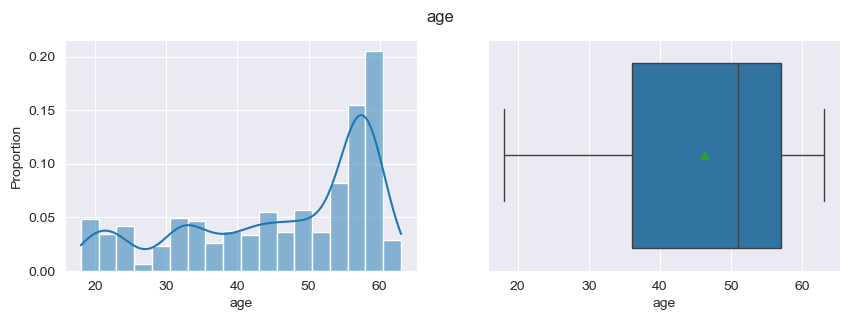

Summary statistics for the age variable 

count    4612.000000
mean       46.201214
std        13.161454
min        18.000000
25%        36.000000
50%        51.000000
75%        57.000000
max        63.000000
Name: age, dtype: float64 


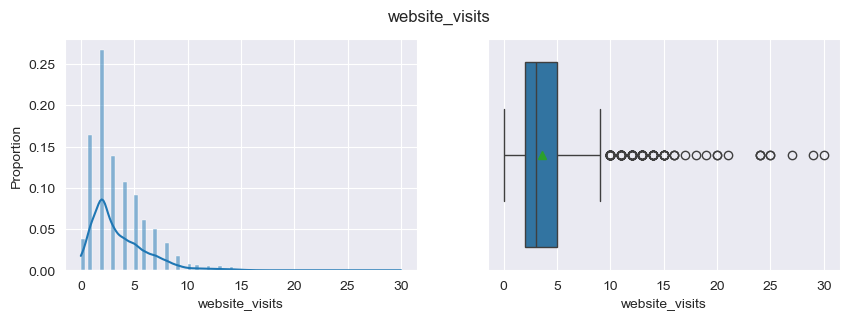

Summary statistics for the website_visits variable 

count    4612.000000
mean        3.566782
std         2.829134
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        30.000000
Name: website_visits, dtype: float64 


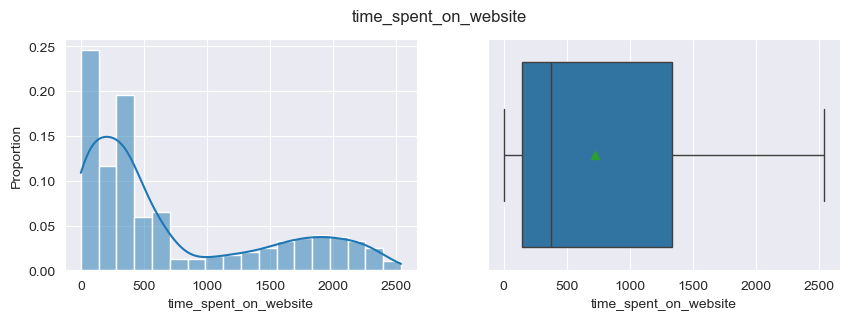

Summary statistics for the time_spent_on_website variable 

count    4612.000000
mean      724.011275
std       743.828683
min         0.000000
25%       148.750000
50%       376.000000
75%      1336.750000
max      2537.000000
Name: time_spent_on_website, dtype: float64 


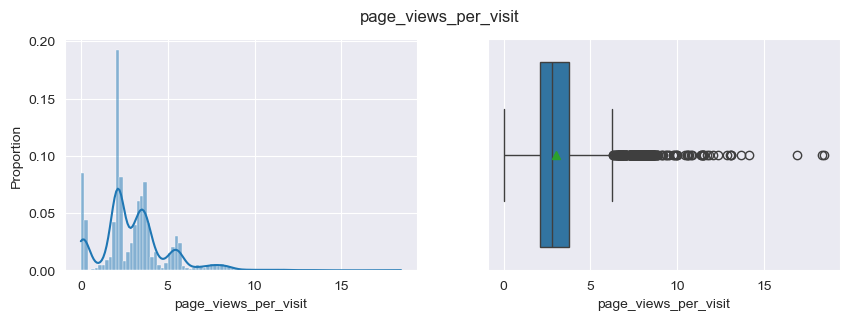

Summary statistics for the page_views_per_visit variable 

count    4612.000000
mean        3.026126
std         1.968125
min         0.000000
25%         2.077750
50%         2.792000
75%         3.756250
max        18.434000
Name: page_views_per_visit, dtype: float64 


In [245]:
# call the function 
analyze_numerical(df[numerical_vars])

In [246]:
# get the number of leads between the ages of 50 and 60
df.loc[(df["age"] <= 60) & (df["age"] >= 50), ["age"]].count() / df.shape[0]

age    0.496964
dtype: float64

In [247]:
# check how many leads visited the website between 5 and 10 times
df.loc[(df["website_visits"] > 5) & (df["website_visits"] <= 10), ["website_visits"]].count() / df.shape[0]

website_visits    0.168474
dtype: float64

In [248]:
df.loc[(df["time_spent_on_website"] > 724), ["time_spent_on_website"]].count() / df.shape[0]

time_spent_on_website    0.312879
dtype: float64

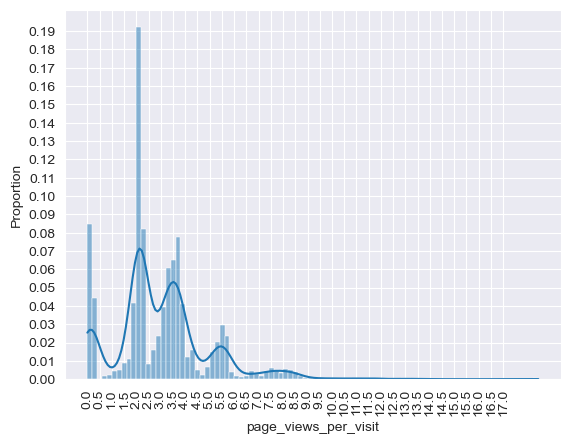

In [249]:
# inspect the cdf of page views per visit
sns.histplot(df, x='page_views_per_visit', kde=True, stat="proportion")
plt.xticks(list(np.arange(0, 17.5, 0.5)), rotation=90)
plt.yticks(list(np.arange(0, 0.2, 0.01)))
plt.show();

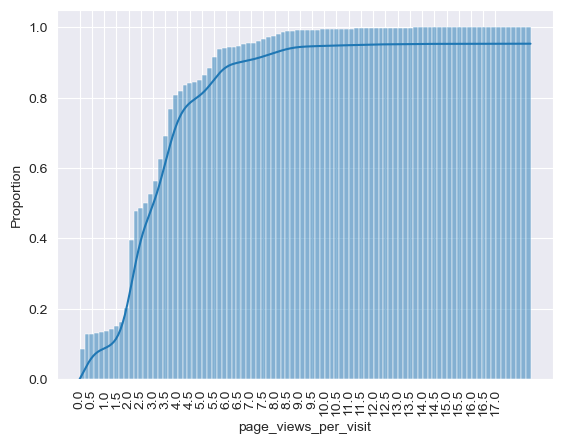

In [250]:
# inspect the cdf of page views per visit
sns.histplot(df, x='page_views_per_visit', kde=True, stat="proportion", cumulative=True)
plt.xticks(list(np.arange(0, 17.5, 0.5)), rotation=90)
plt.show();

## Observations

1. Age: The distribution for the ages of leads is skewed left. Most leads (roughly 50%) are between the ages of 50 and 60. The remaining 50% is roughly uniformly distributed over the ages of 18 and 50. 
2. Number of website visits: Most of the leads (75%) visit the website less than or equal to 5 times. Of the remaining leads, ~ 17% have between 5 (not inclusive) and 10 (inclusive) website visits, and the rest being outliers with a much larger number of website visits than the average (>3 times the average)
3. Time Spent on Website: The distribution for the time that leads spend on the website is right skewed. 25% of leads spend between 0 and 148 seconds on the website, and a further 25% of leads spend between 148 and 376 seconds on the website. For leads that have spent more time on the website than the mean (724 seconds) the distribution is roughly uniform. 30% of leads spend more than the mean time spent on the website. 
4. The page views per visit is multi-modal. Around 80% of leads have less than 5 page views per visit. The distribution of page views per visit is right skewed, with many outliers.  

## Analyze Binary Variables

In [251]:
# function to create bar plots for the binary variables
def analyze_binary(binary_df: pd.DataFrame):
    
    # loop through the columns of the dataframe
    for i, col in enumerate(binary_df.columns):
        
        print(f"{i}. Analysis for {col}:")
        
        plt.figure(figsize=(10, 3))
        
        plt.suptitle(f"{col} normalized bar plot")
        
        # use value counts to get the proportions of Yes and No
        bin_vals: pd.Series = df[col].value_counts(normalize=True)
        
        # create a dataframe using the proportions
        bin_df = pd.DataFrame({col: bin_vals.index, 'Proportion' : bin_vals.values})
        
        sns.barplot(data=bin_df, x=col, y='Proportion')
        
        plt.show()
        
        print(df[col].value_counts(normalize=True))

0. Analysis for print_media_type1:


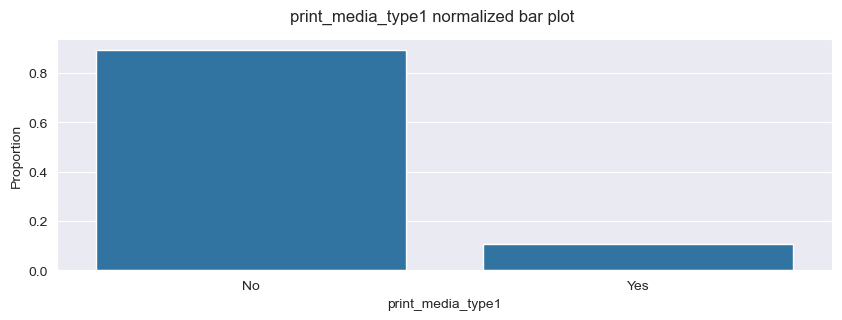

print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
1. Analysis for print_media_type2:


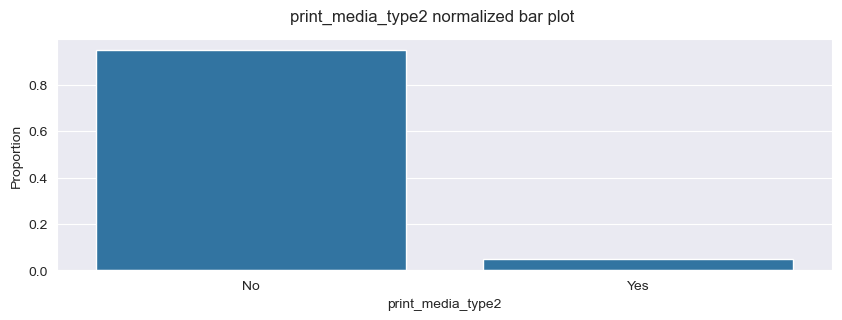

print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
2. Analysis for digital_media:


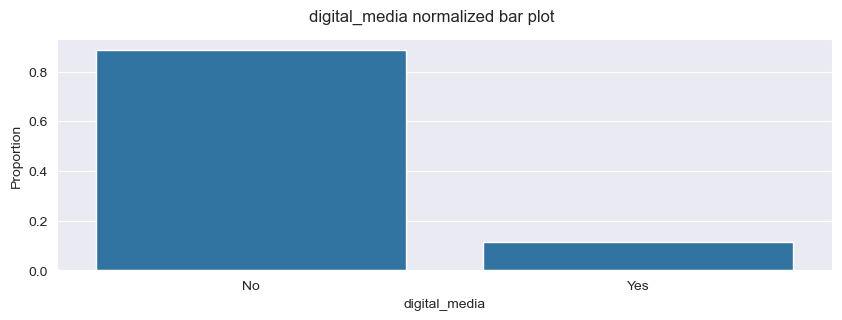

digital_media
No     0.885733
Yes    0.114267
Name: proportion, dtype: float64
3. Analysis for educational_channels:


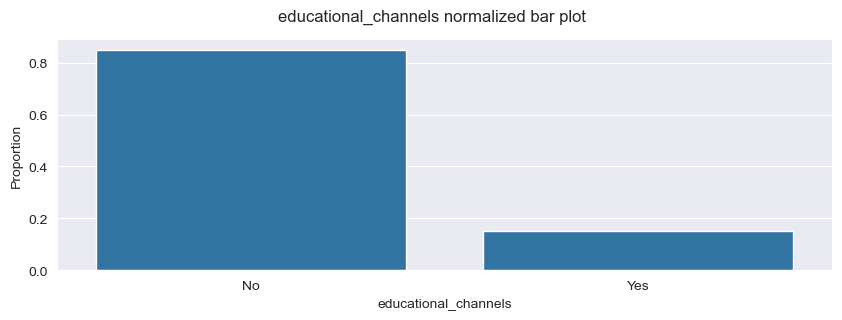

educational_channels
No     0.847138
Yes    0.152862
Name: proportion, dtype: float64
4. Analysis for referral:


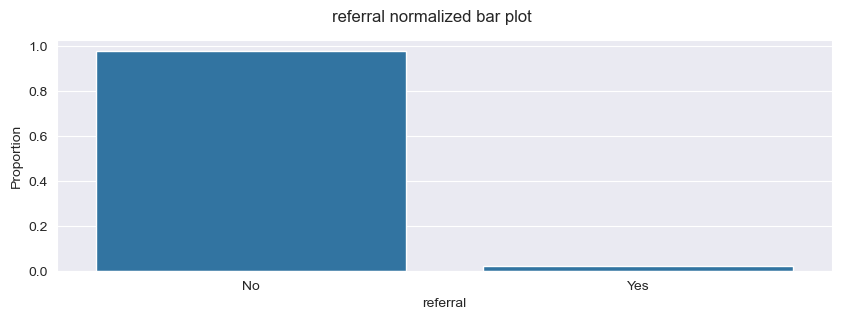

referral
No     0.979835
Yes    0.020165
Name: proportion, dtype: float64


In [252]:
# view a countplot for the binary variables
analyze_binary(df[binary_vars])

## Observations

The binary variables show similar distributions. Most of the binary have a much higher proportion (84% - 97%) "No" than "Yes" (2% - 15%).

## Inspect the Target Variable

In [253]:
# inspect the proportion of leads that were converted
target_proportions: pd.Series = df['status'].value_counts(normalize=True)
target_proportions

status
0    0.701431
1    0.298569
Name: proportion, dtype: float64

## Observations:

The dataset is imbalanced. 70% of observations are not converted in paying customers and only 30% are converted to paying customers.

In [254]:
# intialize a dict to hold these proportions for later models
class_weights: dict = {0: target_proportions[0], 1: target_proportions[1]}

## Bivariate Analysis

## Categorical variables 

In [255]:
# start with categorical data
# plot count plots of each data piece, with hue of status, 

def categorical_proportions(data_df: pd.DataFrame, cols: list):
    
    # compute the joint distribution of the status, and each of the variables in cols
    joint_dist = pd.pivot_table(df, index='status', columns=cols, aggfunc='size')

    # drop the na columns
    joint_dist = joint_dist.loc[1, :].dropna()

    # sort values in descending order
    joint_dist.sort_values(ascending=False, inplace=True)
    
    # make a list of observed values
    observed_values: list = [[value[i] for value in joint_dist.index.values] for i in range(0, len(cols))]

    # make a list of pandas series using the list of observed values
    observed_values_series: list = [pd.Series(observed_values[i]).value_counts(normalize=True) for i in range(0, len(cols))]
    
    for i, col in enumerate(cols):
        
        # compute a pivot table with values being the counts of each observation
        table = pd.pivot_table(df, index="status", columns=col, aggfunc='size')
        
        # compute the proportion rather than count
        table = table.div(table.sum(axis=0), axis=1)
        
        # split words in the title to capitalize
        title = col.split("_")
        
        # capitalize each word in the title and join into a single word 
        title = ' '.join(word.capitalize() for word in title)
        
        # compute the proportions of each value of the variable falling into 1 or 0 of the status variable
        proportions: pd.DataFrame = pd.crosstab(df[col], df["status"], normalize='index').reset_index()
        
        # melt for plotting
        proportions: pd.DataFrame = proportions.melt(id_vars=col, var_name='Status', value_name='Proportion')
        
        # initialize the figure
        plt.figure(figsize=(10, 3))
        
        # add a title
        plt.title(f"Bar plot of {title} by status")
        
        # plot the barplot 
        sns.barplot(x=col, y="Proportion",hue="Status", data=proportions)
        
        # display
        plt.show()
        
        print(f"Proportion of leads converted to paying customers for each value of {col}:", "\n")
        print(table, "\n")
        
        print(f"Empirical distribution of the paying customers (status = 1) with respect to the {col} variable", "\n")
        print(observed_values_series[i])

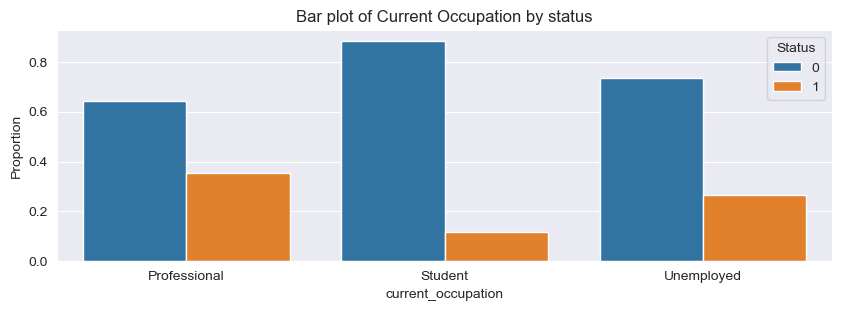

Proportion of leads converted to paying customers for each value of current_occupation: 

current_occupation  Professional   Student  Unemployed
status                                                
0                       0.644878  0.882883    0.734212
1                       0.355122  0.117117    0.265788 

Empirical distribution of the paying customers (status = 1) with respect to the current_occupation variable 

Professional    0.416667
Unemployed      0.361111
Student         0.222222
Name: proportion, dtype: float64


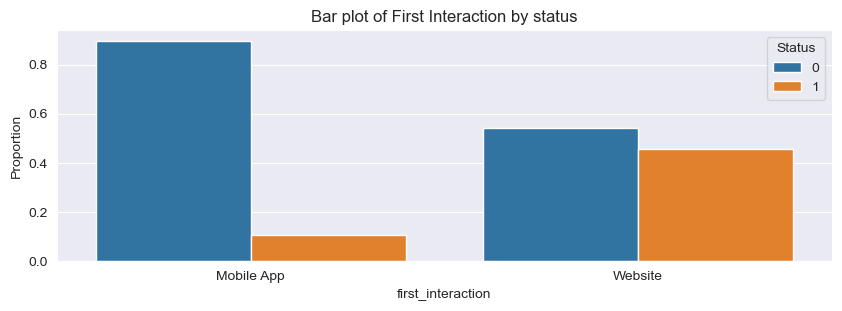

Proportion of leads converted to paying customers for each value of first_interaction: 

first_interaction  Mobile App  Website
status                                
0                    0.894686  0.54406
1                    0.105314  0.45594 

Empirical distribution of the paying customers (status = 1) with respect to the first_interaction variable 

Website       0.583333
Mobile App    0.416667
Name: proportion, dtype: float64


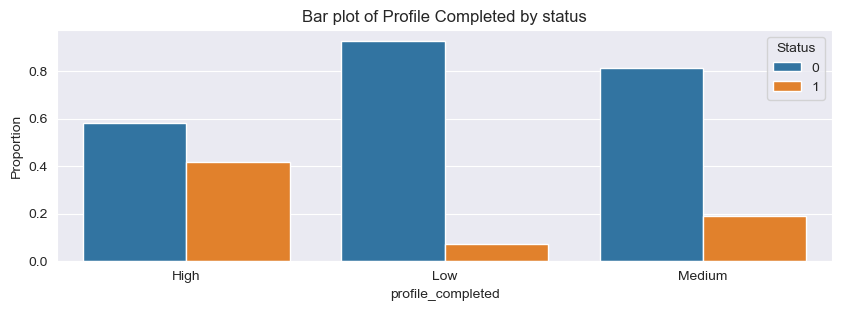

Proportion of leads converted to paying customers for each value of profile_completed: 

profile_completed      High       Low    Medium
status                                         
0                  0.582155  0.925234  0.811245
1                  0.417845  0.074766  0.188755 

Empirical distribution of the paying customers (status = 1) with respect to the profile_completed variable 

High      0.472222
Medium    0.416667
Low       0.111111
Name: proportion, dtype: float64


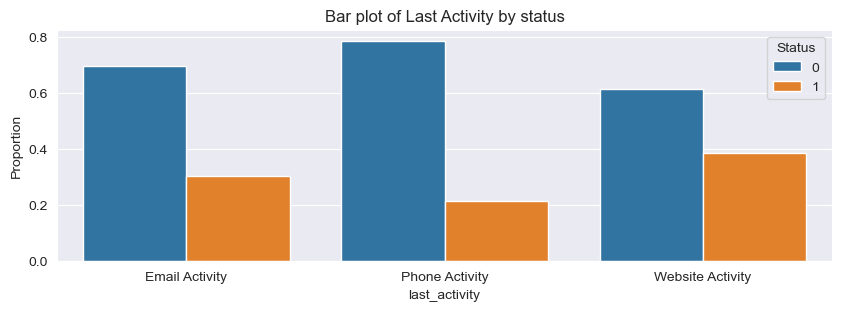

Proportion of leads converted to paying customers for each value of last_activity: 

last_activity  Email Activity  Phone Activity  Website Activity
status                                                         
0                    0.696664        0.786872          0.615455
1                    0.303336        0.213128          0.384545 

Empirical distribution of the paying customers (status = 1) with respect to the last_activity variable 

Email Activity      0.388889
Website Activity    0.333333
Phone Activity      0.277778
Name: proportion, dtype: float64


In [256]:
# plot the countplots for the categorical variables against status
categorical_proportions(df, categorical_vars)

## Observations

Bivariate analysis of individual categorical variables with the status variable.

1. Current Occupation: Professionals are more likely to be converted to paying customers (~36% converted vs ~64% not converted) compared to students (88% not converted and 12% converted) and unemployed individuals (73% not converted and 27% converted). This is supported by the fact that of leads that have been converted to paying customers, ~42% are professionals, 36% are unemployed and 22% are students. 
2. First Interaction: Leads whose first interaction was by website show the highest conversion rate (45%) than any other value of any other categorical variable. Leads whose interaction was via mobile phone only show an 11% conversion rate. 
3. Profile completed: High Profile completed also shows a strong association with conversion to paying customer with a conversion rate of 42%.  Leads with Medium and Low profile completion show low conversion rates, 19% and 7% respectively. However, of leads that are converted to paying customers, 42% have a Medium profile completion compared to 47% who have a high profile completion. 
4. Last Activity: Leads who have last interacted with the website show a relatively high conversion rate of 38%. Email activity also seems to have a relatively strong correlation with conversion (30% conversion rate). Phone activity has a conversion rate of 20%, which may also be significant.

Further analysis:

36 unique combinations of the categorical columns are observed for customers that have been converted into paying customers. 41% of these combinations are Professionals, 36% are unemployed and only 22% are students. Most converted leads have had their first interaction through a website (58%) vs the Mobile App (41%). Roughly 90% of converted leads had either a High or Medium profile completion, and only 11% had a Low profile completion. 

## Numerical Variables

In [257]:
# view the summary statistic for status = 0
summary_stats_0 = df.loc[df["status"]==0,numerical_vars].describe().T
summary_stats_0

,count,mean,std,min,25%,50%,75%,max
age,3235.0,45.153014,13.748843,18.0,33.0000,49.000,57.0000,63.000
website_visits,3235.0,3.578980,2.874222,0.0,2.0000,3.000,5.0000,30.000
time_spent_on_website,3235.0,577.420711,676.340484,0.0,88.0000,317.000,646.0000,2531.000
page_views_per_visit,3235.0,3.025732,1.997962,0.0,2.0745,2.706,3.7735,18.434


In [258]:
# view the summary statistic for status = 1
summary_stats_1 = df.loc[df["status"]==1,numerical_vars].describe().T
summary_stats_1

,count,mean,std,min,25%,50%,75%,max
age,1377.0,48.663762,11.293692,18.0,41.000,54.000,58.00,63.000
website_visits,1377.0,3.538126,2.721075,0.0,2.000,3.000,5.00,25.000
time_spent_on_website,1377.0,1068.397967,780.856643,0.0,390.000,789.000,1829.00,2537.000
page_views_per_visit,1377.0,3.027050,1.896893,0.0,2.083,2.935,3.73,13.656


### View summary statistics over different outcomes of the status variable

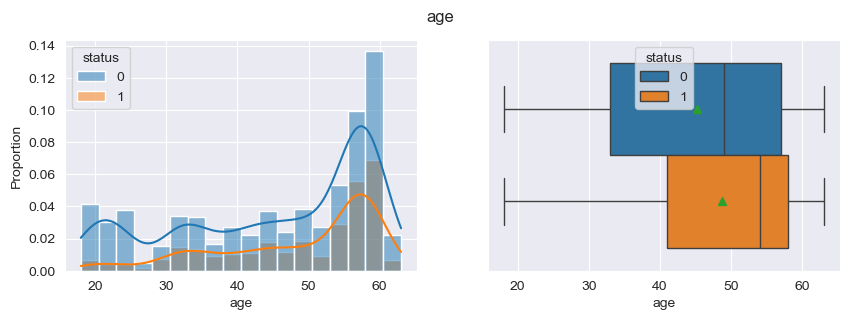

Comparison of the summary statistics for paying and non-paying customers for the age variable 

             age_0        age_1
count  3235.000000  1377.000000
mean     45.153014    48.663762
std      13.748843    11.293692
min      18.000000    18.000000
25%      33.000000    41.000000
50%      49.000000    54.000000
75%      57.000000    58.000000
max      63.000000    63.000000 


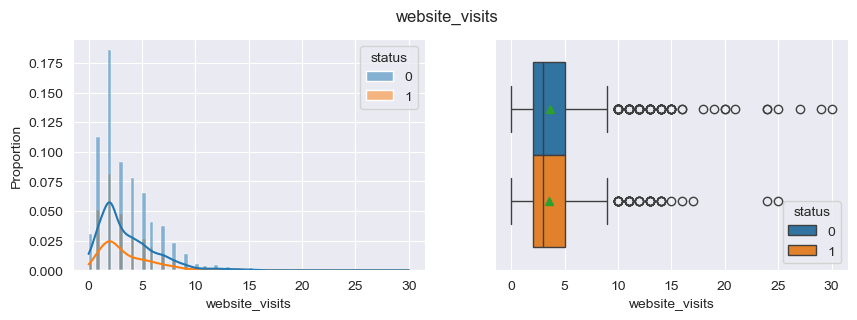

Comparison of the summary statistics for paying and non-paying customers for the website_visits variable 

       website_visits_0  website_visits_1
count       3235.000000       1377.000000
mean           3.578980          3.538126
std            2.874222          2.721075
min            0.000000          0.000000
25%            2.000000          2.000000
50%            3.000000          3.000000
75%            5.000000          5.000000
max           30.000000         25.000000 


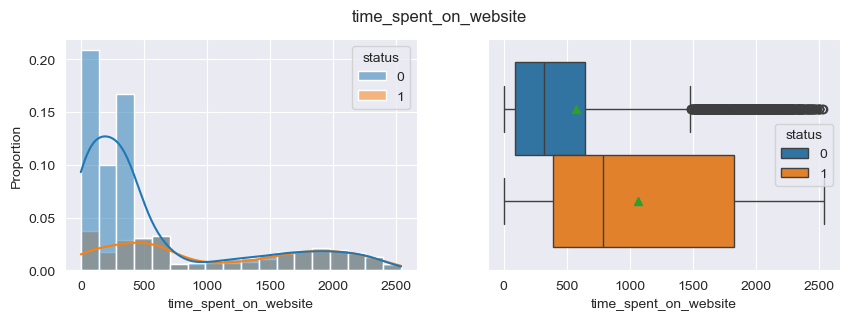

Comparison of the summary statistics for paying and non-paying customers for the time_spent_on_website variable 

       time_spent_on_website_0  time_spent_on_website_1
count              3235.000000              1377.000000
mean                577.420711              1068.397967
std                 676.340484               780.856643
min                   0.000000                 0.000000
25%                  88.000000               390.000000
50%                 317.000000               789.000000
75%                 646.000000              1829.000000
max                2531.000000              2537.000000 


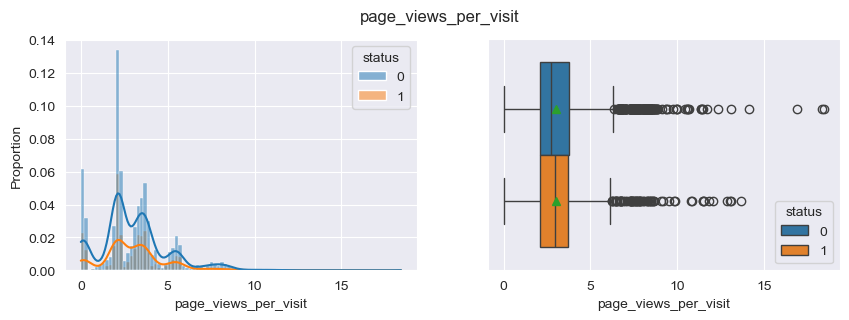

Comparison of the summary statistics for paying and non-paying customers for the page_views_per_visit variable 

       page_views_per_visit_0  page_views_per_visit_1
count             3235.000000             1377.000000
mean                 3.025732                3.027050
std                  1.997962                1.896893
min                  0.000000                0.000000
25%                  2.074500                2.083000
50%                  2.706000                2.935000
75%                  3.773500                3.730000
max                 18.434000               13.656000 


In [259]:
analyze_numerical(numerical_vars, True)

### Observations

1. Age: The distribution of the age variable is left skewed with respect to both paid and unpaid customers. However, for paying customers, most of the data is clustered around the 40 - 65 age groups, with a mean age of around 48 years. Whereas customers who have not been converted into paying customers tend to fall into slightly lower age groups, i.e. less than 40 years old. 

2. Time spent on website: Leads that are converted to paid customers show a much larger mean time spent on website, 1068, compared to leads that are not converted to paying customers who spend 577 seconds on the website on average. This suggests that time spent on website could be good indicator of whether a lead will be converted to a paying customer or not.

3. Page views per visit: The distribution for the page views per visit across the different values of status is almost identical. The mean, as well as the 25th, 50th and 75th percentile are practically equal. This suggests that page views per visit is not relevant in determining whether leads are converted to paid customers or not.

4. Website visits show a similar distribution for converted leads and leads that were not converted. This suggests that the number of website visits is not important in predicting whether a lead will be converted or not. 





### Inspect the correlations between variables

<Axes: >

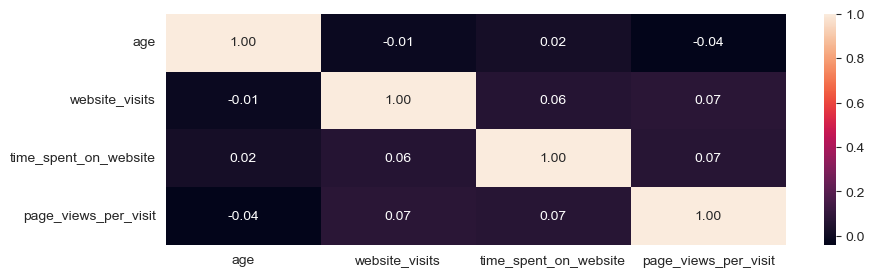

In [260]:
# use a heatmap
plt.figure(figsize=(10, 3))
sns.heatmap(df[numerical_vars].corr(), annot=True, fmt='0.2f')

The correlations between numerical variables is very weak or non-existent, indicating that the numerical variables are independent of each other.

## Binary Variables

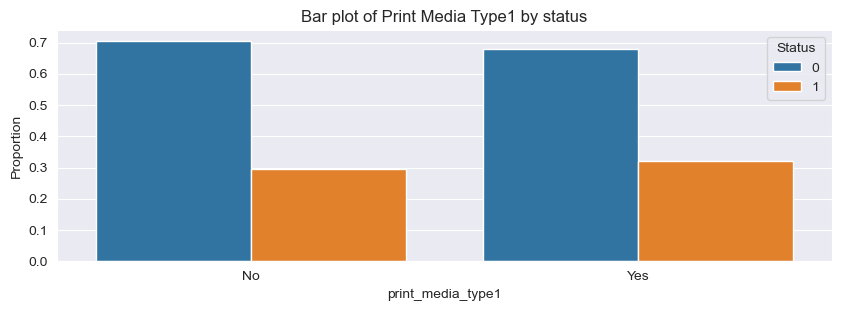

Proportion of leads converted to paying customers for each value of print_media_type1: 

print_media_type1       No      Yes
status                             
0                  0.70401  0.68008
1                  0.29599  0.31992 

Empirical distribution of the paying customers (status = 1) with respect to the print_media_type1 variable 

No     0.565217
Yes    0.434783
Name: proportion, dtype: float64


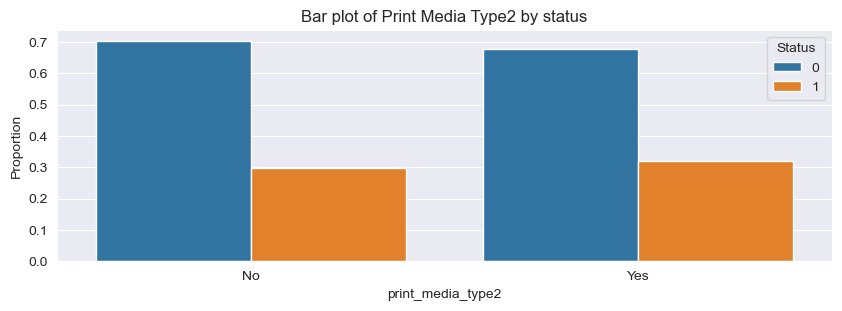

Proportion of leads converted to paying customers for each value of print_media_type2: 

print_media_type2        No       Yes
status                               
0                  0.702672  0.678112
1                  0.297328  0.321888 

Empirical distribution of the paying customers (status = 1) with respect to the print_media_type2 variable 

No     0.652174
Yes    0.347826
Name: proportion, dtype: float64


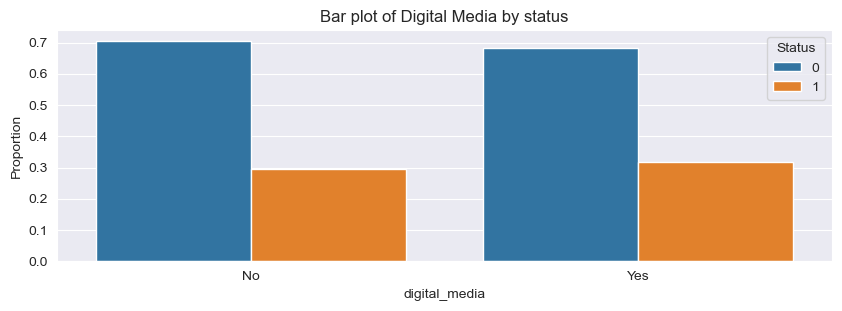

Proportion of leads converted to paying customers for each value of digital_media: 

digital_media        No       Yes
status                           
0              0.704039  0.681214
1              0.295961  0.318786 

Empirical distribution of the paying customers (status = 1) with respect to the digital_media variable 

No     0.565217
Yes    0.434783
Name: proportion, dtype: float64


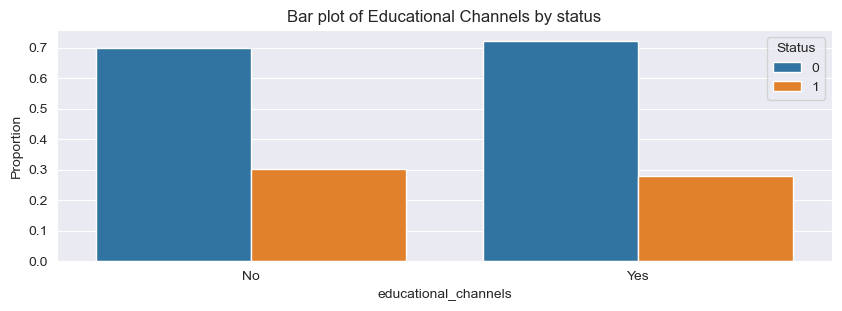

Proportion of leads converted to paying customers for each value of educational_channels: 

educational_channels        No       Yes
status                                  
0                     0.697978  0.720567
1                     0.302022  0.279433 

Empirical distribution of the paying customers (status = 1) with respect to the educational_channels variable 

No     0.565217
Yes    0.434783
Name: proportion, dtype: float64


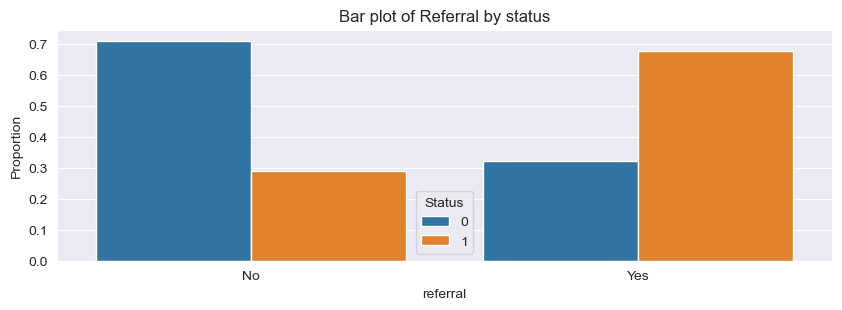

Proportion of leads converted to paying customers for each value of referral: 

referral        No       Yes
status                      
0         0.709228  0.322581
1         0.290772  0.677419 

Empirical distribution of the paying customers (status = 1) with respect to the referral variable 

No     0.608696
Yes    0.391304
Name: proportion, dtype: float64


In [261]:
# see a bar plot of the proportions of value falling into each value of the status variable
categorical_proportions(df, binary_vars)

## Observations

The distributions of each out outcome of the binary variables with respect to the status variable are virtually identical (except the referral variable). Further, the distributions of the "No" and "Yes" categories of each variable with respect to the two outcomes of the status variable also have almost identical distributions (0, ~ 70% and 1, ~30%).  

The referral variable is the exception. The distribution of the "No" category of the referral variable with respect to the status variable is virtually identical to that of each of the other variables. However, the "Yes" category of the referral variable has the opposite distribution with respect to the status variable, (30% 0, and 70% 1). This suggests that a lead having heard about the program through a referral plays a major role in whether or not the lead is converted to a paying customer. 

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

Professionals are more likely to be converted to paying customers (~36% conversion rate) compared to students (12% conversion rate) and unemployed individuals (27% conversion rate). This is supported by observing that 42% of leads that become paying customers are employed as Professionals, 33%  are unemployed and only 22% are students. This suggests that professionals are twice as likely to become paying customers than students. 

2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 

The conversion rate for leads who first interacted with the company via its website is 4 times higher (45%) than the conversion rate of leads who first interacted with the company via its mobile application 11%. This could suggest that the website is more appealing to customers. Further 58% of all leads that were converted to paying customers had their first interaction via the website.

3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 

Customers who have last interacted with the website have the highest conversion rate (38%) among the other modes of interaction (30% conversion rate for email, and 21% conversion rate for phone media. This is important when noting that customers whose first interaction with the company was via the website have a high conversion rate, and that most customers who are paying customers had their first interaction via the company's website.

4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

Most of the company's channels for obtaining leads are ineffective and have no effect on the lead status, since the distribution of these variables mirrors the distribution of the lead status (70% 0 and 30% 1). The exception is leads acquired through referrals, which have a conversion rate of ~ 68%. 

5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

Leads who had High profile completion had a much higher conversion rate (42%) than leads who had only medium (19%) or low profile completion (7.5%). This clearly shows that high profile completion gives the company better chances of converting the lead into a paid customer. 

# Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

## Keep only the relevant variables

In [262]:
# make a copy of the binary variables list
binary_vars_drop = copy.deepcopy(binary_vars)

# keep only the referral variable
binary_vars_drop.remove('referral')

# remove from the numerical variables list also 
for col in binary_vars_drop:
    binary_vars.remove(col)
    
print(binary_vars)
print(binary_vars_drop)

['referral']
['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels']


In [263]:
# make a copy of the numerical vars
numerical_vars_drop = copy.deepcopy(numerical_vars)

# remove unecessary values from numerical variables list
numerical_vars_drop.remove('age')
numerical_vars_drop.remove('time_spent_on_website')

# remove from the numerical vars list also 
for col in numerical_vars_drop:
    numerical_vars.remove(col)
    
print(numerical_vars)
print(numerical_vars_drop)

['age', 'time_spent_on_website']
['website_visits', 'page_views_per_visit']


In [264]:
# drop the two columns form the numerical variables and all the binary variables except referral
cols_to_drop = numerical_vars_drop + binary_vars_drop

# inspect the list of columns to drop 
print(cols_to_drop)

['website_visits', 'page_views_per_visit', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels']


In [265]:
# drop unecessary columns
df = df.drop(columns=cols_to_drop, inplace=False)

# inspect the dataframe
df.head()

,age,current_occupation,first_interaction,profile_completed,time_spent_on_website,last_activity,referral,status
0,57,Unemployed,Website,High,1639,Website Activity,No,1
1,56,Professional,Mobile App,Medium,83,Website Activity,No,0
2,52,Professional,Website,Medium,330,Website Activity,No,0
3,53,Unemployed,Website,High,464,Website Activity,No,1
4,23,Student,Website,High,600,Email Activity,No,0


## Encode the values of the categorical and binary variables

In [266]:
#encode the referral binary variable
df['referral'] = df['referral'].map({"Yes": 1, "No": 0})

# first interaction takes on two outcomes so encode as a binary variable
df['first_interaction'] = df['first_interaction'].map({"Website": 1, "Mobile App": 0})

# inspect the resulting values in the referral column
df['referral'].unique()

array([0, 1], dtype=int64)

In [267]:
# remove first interaction from the categorical variables and add to binary variables
binary_vars.append("first_interaction")
categorical_vars.remove("first_interaction")

In [268]:
# encode the categorical variables with dummy variables
df = pd.get_dummies(df,columns=categorical_vars, dtype='int')

df.head()

,age,first_interaction,time_spent_on_website,referral,status,current_occupation_Professional,current_occupation_Student,current_occupation_Unemployed,profile_completed_High,profile_completed_Low,profile_completed_Medium,last_activity_Email Activity,last_activity_Phone Activity,last_activity_Website Activity
0,57,1,1639,0,1,0,0,1,1,0,0,0,0,1
1,56,0,83,0,0,1,0,0,0,0,1,0,0,1
2,52,1,330,0,0,1,0,0,0,0,1,0,0,1
3,53,1,464,0,1,0,0,1,1,0,0,0,0,1
4,23,1,600,0,0,0,1,0,1,0,0,1,0,0


## Split the data into features and classes

In [269]:
# get dataframe of features
X: pd.DataFrame = df.drop(labels='status',axis=1, inplace=False)

# series for response variable
Y: pd.Series = df['status']

## Split the data into test and training sets

In [270]:
#use the train_test_split function to split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

## Scale the data (Not Binary Variables)

In [271]:
# initialize a standard scaler instance
sc = StandardScaler()

sc = sc.fit(X_train[numerical_vars])

# make a copy of the training and test dataframes
X_train_df = X_train.copy()
X_test_df = X_test.copy()

# only scale the numerical data types, since thresholds will be difficult to interpret with scaled binary variables
X_train_df[numerical_vars] = sc.transform(X_train[numerical_vars])
X_test_df[numerical_vars] = sc.transform(X_test_df[numerical_vars])

In [272]:
X_train_df.head()

,age,first_interaction,time_spent_on_website,referral,current_occupation_Professional,current_occupation_Student,current_occupation_Unemployed,profile_completed_High,profile_completed_Low,profile_completed_Medium,last_activity_Email Activity,last_activity_Phone Activity,last_activity_Website Activity
1406,-1.086511,0,0.743447,0,0,0,1,1,0,0,0,1,0
3611,-1.920935,1,-0.972038,0,0,1,0,0,0,1,1,0,0
4096,-0.024518,0,-0.573275,0,1,0,0,1,0,0,1,0,0
1146,0.809905,0,-0.209303,0,1,0,0,0,0,1,0,0,1
2977,1.113332,1,-0.972038,0,0,0,1,0,0,1,0,1,0


## Function for model evaluation

In [274]:
# function for model evaluation
# function fro model evaluation
# define a function to evalute the models performance
def evaluate_model(tree: DecisionTreeClassifier):
    
    # make predictions on the training set
    y_pred_train = tree.predict(X_train_df)
    
    # make predictions on the testing set
    y_pred_test = tree.predict(X_test_df)
    
    print("Analysis of the model on the training data set: ", '\n')
    
    print("Classification report for the training data set: ", '\n')
    
    cr_train = classification_report(Y_train, y_pred_train)
    # print a classification report 
    print(cr_train, '\n')
    
    #initialze confusion matrix 
    cm_train: np.ndarray = confusion_matrix(Y_train, y_pred_train)
    
    print("Confusion matrix on the training data set: ", '\n')

    print(cm_train, '\n')
    
    print("Analysis of the model on the testing data set: ", '\n')
    
    print("Classification report for the testing data set: ", '\n')
    # print a classification report 
    
    cr_test = classification_report(Y_test, y_pred_test)
    print(cr_test, '\n')
    
    #initialze confusion matrix 
    cm_test: np.ndarray = confusion_matrix(Y_test, y_pred_test)
    
    print("Confusion matrix on the testing data set: ", '\n')

    print(cm_test)
    
    

# Building a Decision Tree model

In [275]:
# initialize a decision tree model instance 
# the class weights are according to the proportion of 0's and 1's in the status variable observed in the dataset
decision_classifier = DecisionTreeClassifier(class_weight={0: 0.7, 1: 0.3}, random_state=42)

In [276]:
# fit the data to the tree classifier
decision_classifier.fit(X_train_df, Y_train)

DecisionTreeClassifier(class_weight={0: 0.7, 1: 0.3}, random_state=42)

## Analysis of model

In [277]:
# make predictions based on the training set
evaluate_model(decision_classifier)

Analysis of the model on the training data set:  

Classification report for the training data set:  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2425
           1       1.00      1.00      1.00      1034

    accuracy                           1.00      3459
   macro avg       1.00      1.00      1.00      3459
weighted avg       1.00      1.00      1.00      3459
 

Confusion matrix on the training data set:  

[[2425    0]
 [   4 1030]] 

Analysis of the model on the testing data set:  

Classification report for the testing data set:  

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       810
           1       0.65      0.66      0.66       343

    accuracy                           0.79      1153
   macro avg       0.75      0.76      0.75      1153
weighted avg       0.79      0.79      0.79      1153
 

Confusion matrix on the testing data set:  

[[685 125]
 [115 2

## Do we need to prune the tree?

We see that the model performs perfectly on the training set, but that performance has significantly decreased on the test data set. The indicates that the tree is overfitting the data (has grown too large), and could benefit from pruning.

## Use Cost complexity to prune the tree

In [278]:
# get the path
path: Bunch = decision_classifier.cost_complexity_pruning_path(X_train_df,Y_train)
    
# get the alphas
alphas: np.ndarray = path.ccp_alphas

# get the impurities
impurities: np.ndarray = path.impurities

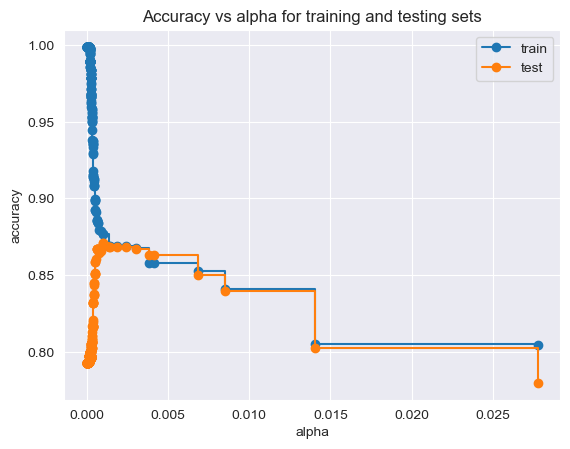

In [279]:
# train the decision tree using effective alphas

# list to hold each of the pruned trees for different values of alpha
pruned_trees = []

for alpha in alphas:
    # initialize a tree model with the current alpha
    treex = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    
    # fit the data to the model 
    treex.fit(X_train_df, Y_train)
    
    #append the model to the list
    pruned_trees.append(treex)
        
# accuracy vs alpha for training and test sets

# get the train scores?
train_scores: list = [t.score(X_train_df,Y_train) for t in pruned_trees]

# get the test scores
test_scores: list = [t.score(X_test_df, Y_test) for t in pruned_trees]
    
# plot the results
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [280]:
# get the value of alpha that maximizes the accuracy
alpha_star_idx: int = test_scores.index(max(test_scores))

alpha_star: float = alphas[alpha_star_idx]
    
print(f"We see that the best alpha is: {alpha_star} which gives an accuracy of {max(test_scores)} on the testing data set.")

We see that the best alpha is: 0.0010027028335754442 which gives an accuracy of 0.8707718993928881 on the testing data set.


## Fit a decision Tree using the best alpha

In [281]:
 # intialize the tree classifier with the alpha that maximizes accuracy on the test set
tree_star = DecisionTreeClassifier(random_state=1, ccp_alpha=alpha_star)

# fit the data to the tree
tree_star.fit(X_train_df, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0010027028335754442, random_state=1)

## Evaluate Performance of the model

In [282]:
evaluate_model(tree_star)

Analysis of the model on the training data set:  

Classification report for the training data set:  

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2425
           1       0.82      0.75      0.78      1034

    accuracy                           0.88      3459
   macro avg       0.86      0.84      0.85      3459
weighted avg       0.87      0.88      0.87      3459
 

Confusion matrix on the training data set:  

[[2254  171]
 [ 256  778]] 

Analysis of the model on the testing data set:  

Classification report for the testing data set:  

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       810
           1       0.81      0.74      0.77       343

    accuracy                           0.87      1153
   macro avg       0.85      0.83      0.84      1153
weighted avg       0.87      0.87      0.87      1153
 

Confusion matrix on the testing data set:  

[[751  59]
 [ 90 2

## Observations

The decision classifier has benefited from the pruning and use of the optimal alpha. It is no longer overfitting on the training set, and accuracy on the test set has improved.

## Analyze the Model

#### Visualize feature importances

In [283]:
# get the list of importances for each feature
feature_importances: np.ndarray = tree_star.feature_importances_

#initialize a dataframe using the importance array
importance_df: pd.DataFrame = pd.DataFrame(feature_importances,columns=["Importance"], index = X.columns).sort_values(by = "Importance", ascending=False)

# inspect the resulting dataframe
print(importance_df)

                                 Importance
first_interaction                  0.350096
time_spent_on_website              0.274722
profile_completed_High             0.129299
current_occupation_Professional    0.096596
last_activity_Phone Activity       0.055373
age                                0.025985
last_activity_Website Activity     0.016616
current_occupation_Student         0.015934
last_activity_Email Activity       0.013882
profile_completed_Low              0.011453
current_occupation_Unemployed      0.005707
referral                           0.004339
profile_completed_Medium           0.000000


<Axes: xlabel='Importance', ylabel='None'>

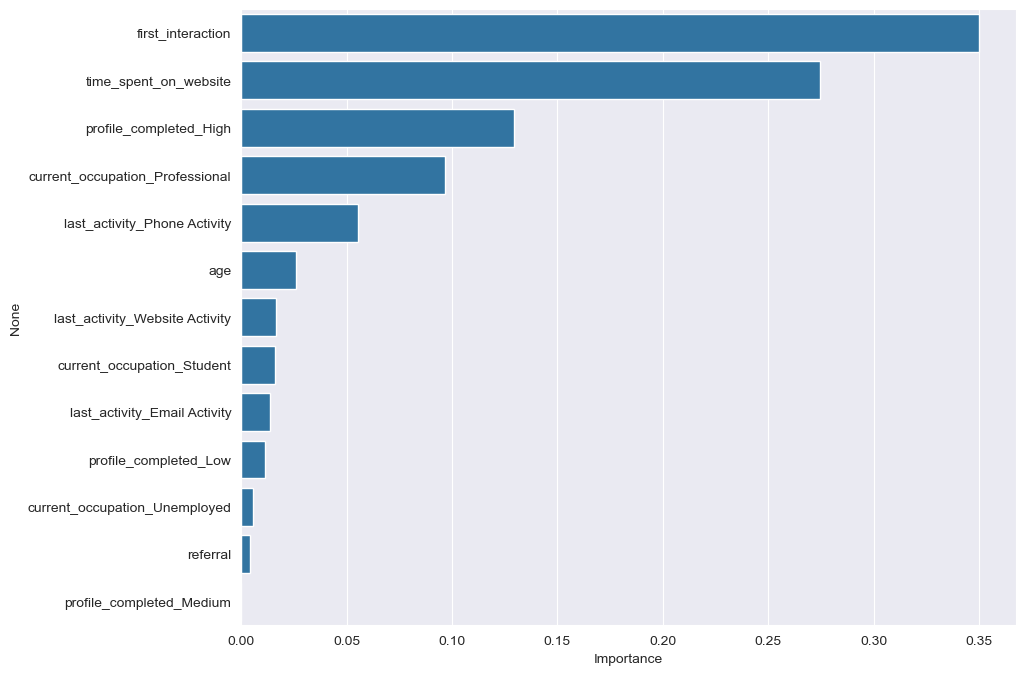

In [284]:
# create an empty figure
plt.figure(figsize = (10, 8))

# plot a bar chart
sns.barplot(importance_df, x = "Importance", y = importance_df.index)

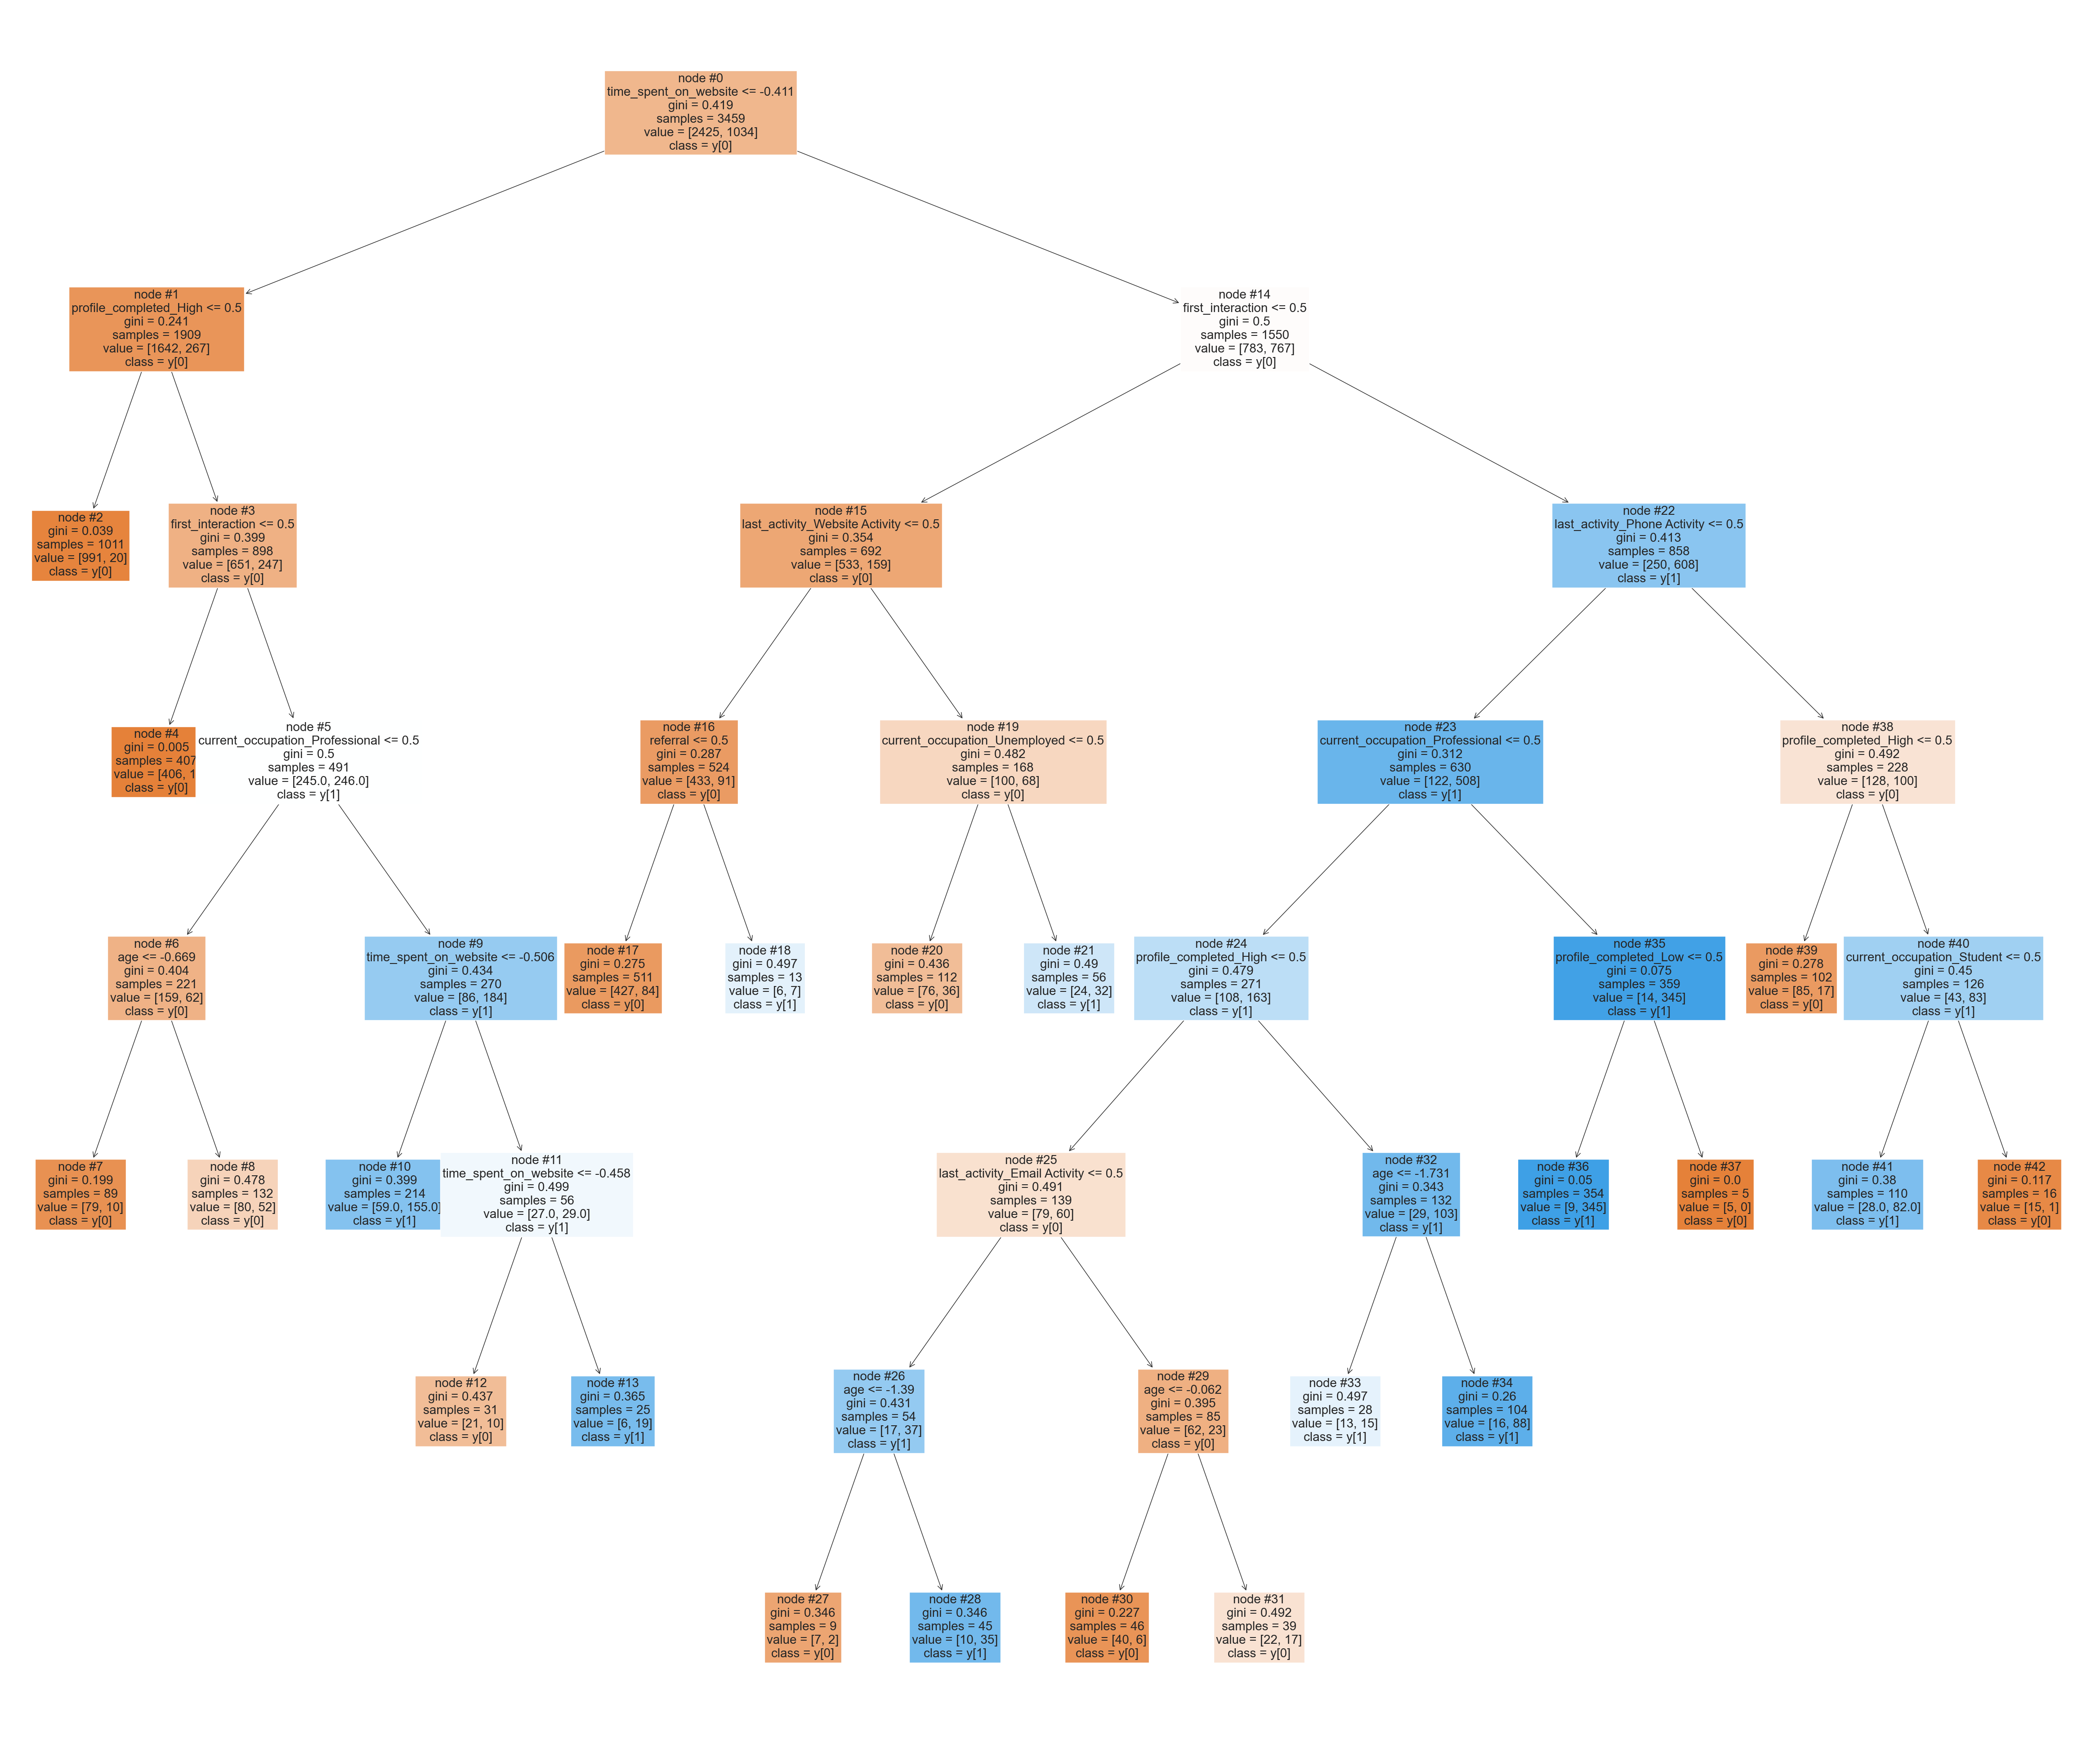

In [285]:
# get the list of features to plot
features = list(X.columns)

# initialize an empty figure 
plt.figure(figsize = (60, 50))

#create a plot of the tree
tree.plot_tree(tree_star, feature_names = features, filled = True, fontsize = 20, node_ids = True, class_names = True)

plt.show()

### Observations

The decision tree shows that the most important features for determining whether a lead will be converted or not are: 
1.	First interaction
2.	The amount of time the lead has spent on the website
3.	High profile completion 
4.	Working as a professional

More than 50% of the total reduction in impurity is due to the first interaction and the amount of time spent the lead has spent on the website, (35% and 27% respectively). Other important factors include a high profile-completion (13%) and a professional occupation (~10%). The nodes that contain the most number of positive cases, with relatively good purity are node 36, node 34 and node 10.

In [286]:
# get the thresholds of nodes for developing consumer profile

learned_tree = tree_star.tree_

# initialize a dict of nodes and paths to the nodes
node_paths: dict = {
    36: [0, 14, 22, 23, 35],
    34: [0, 14, 22, 23, 24, 32],
    10: [0, 1, 3, 5, 9]
}

for i, path in node_paths.items():
    print(f"Key features for Leaf (Node) {i}", "\n")
    for node in path:
        # find the index of the feature of the training data associated with the node 
        idx = learned_tree.feature[node]
        
        # get the column name
        col = X_train_df.columns[learned_tree.feature[node]]
        
        if col in numerical_vars:
            # convert the threshold back to the original scale
            threshold = learned_tree.threshold[node] * df[col].std() + df[col].mean()
        else: 
            threshold = learned_tree.threshold[node]
        
        #print the feature name and threshold
        print(f"Node: {node}'\t'Feature: {col}'\t'Threshold: {threshold}")
    print()

Key features for Leaf (Node) 36 

Node: 0'	'Feature: time_spent_on_website'	'Threshold: 418.5268916442045
Node: 14'	'Feature: first_interaction'	'Threshold: 0.5
Node: 22'	'Feature: last_activity_Phone Activity'	'Threshold: 0.5
Node: 23'	'Feature: current_occupation_Professional'	'Threshold: 0.5
Node: 35'	'Feature: profile_completed_Low'	'Threshold: 0.5

Key features for Leaf (Node) 34 

Node: 0'	'Feature: time_spent_on_website'	'Threshold: 418.5268916442045
Node: 14'	'Feature: first_interaction'	'Threshold: 0.5
Node: 22'	'Feature: last_activity_Phone Activity'	'Threshold: 0.5
Node: 23'	'Feature: current_occupation_Professional'	'Threshold: 0.5
Node: 24'	'Feature: profile_completed_High'	'Threshold: 0.5
Node: 32'	'Feature: age'	'Threshold: 23.41488149893755

Key features for Leaf (Node) 10 

Node: 0'	'Feature: time_spent_on_website'	'Threshold: 418.5268916442045
Node: 1'	'Feature: profile_completed_High'	'Threshold: 0.5
Node: 3'	'Feature: first_interaction'	'Threshold: 0.5
Node: 5'	'Fea

# Building a random Forest Model

In [287]:
# initialize the model
# Fitting the Random Forest classifier on the training data
rf_classifier = RandomForestClassifier(class_weight={0: 0.7, 1: 0.3}, random_state = 1)

rf_classifier.fit(X_train_df, Y_train)

RandomForestClassifier(class_weight={0: 0.7, 1: 0.3}, random_state=1)

In [288]:
# evaluate the model performance
evaluate_model(rf_classifier)

Analysis of the model on the training data set:  

Classification report for the training data set:  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2425
           1       1.00      1.00      1.00      1034

    accuracy                           1.00      3459
   macro avg       1.00      1.00      1.00      3459
weighted avg       1.00      1.00      1.00      3459
 

Confusion matrix on the training data set:  

[[2425    0]
 [   4 1030]] 

Analysis of the model on the testing data set:  

Classification report for the testing data set:  

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       810
           1       0.76      0.69      0.72       343

    accuracy                           0.84      1153
   macro avg       0.82      0.80      0.81      1153
weighted avg       0.84      0.84      0.84      1153
 

Confusion matrix on the testing data set:  

[[733  77]
 [105 2

## Do we need to prune the tree?

Evaluating the model on the training data gives a precision and recall of 100% for both the positive and negative classes. However, the precision and recall computed with respect to the testing data gives precisions of 0.88 and 0.75 for negative and positive classes respectively and a recall of 0.9 and 0.71 for negative and positive classes respectively. This suggests that the model is overfitting. 

For Random Forest Models, the ensemble "tree" is not "pruned" in the same way that the usual decision tree is pruned (cost complexity). Rather the tree is implicitly pruned by limiting the maximum depth, setting a minimum number of features to split by and setting a minimum number of observations to be present in leaf nodes for the trees in the ensemble. The number of trees used in the forest is also used to limit overfitting. 

These strategies will now be used to tuned the random forest model.

## Hyperparameter tuning

In [289]:
# intialize a random forest model for tuning
rf_tuned = RandomForestClassifier(class_weight=class_weights, random_state=1)

The ranges used in the dictionary of hyperparameter were based on a preliminary trial and error, in which a few models were initialized to evaluate the general asymptotic behaviour of the model for small and large values of each hyperparameter. 

In [290]:
# initialize a dict of hyperparamters to tune
params = {
    'n_estimators': list(range(300, 700, 50)),
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 5, 10, 15, 20], 
    'min_samples_split': list(range(2, 8)), 
    'min_samples_leaf': list(range(2, 8))
}

In [291]:
# initialize a customer scorer objective function
# focus on detecting the true cases (sensitivity/ true positive rate), since these are the cases we want to detect
scorer = metrics.make_scorer(recall_score, pos_label=1)

In [292]:
# initialize the grid search instance
grid_obj = GridSearchCV(rf_tuned, params, scoring=scorer, cv=5, n_jobs=-1)

In [151]:
# fit the grid search to find the best combination of hyperparameters
grid_obj = grid_obj.fit(X_train_df, Y_train)

KeyboardInterrupt: 

In [293]:
# set the hyperparameters of the tuned rf to the best ones found by the search 
rf_tuned_star = grid_obj.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [294]:
# intialize a rf with hyperparameters found in the grid search
rf_tuned_star = RandomForestClassifier(class_weight={0:0.6, 1:0.4}, random_state=1, max_features='sqrt' ,min_samples_split=2, min_samples_leaf=2, max_depth=15, n_estimators=800)

rf_tuned_star.fit(X_train_df, Y_train)

RandomForestClassifier(class_weight={0: 0.6, 1: 0.4}, max_depth=15,
                       min_samples_leaf=2, n_estimators=800, random_state=1)

In [295]:
evaluate_model(rf_tuned_star)

Analysis of the model on the training data set:  

Classification report for the training data set:  

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2425
           1       0.94      0.81      0.87      1034

    accuracy                           0.93      3459
   macro avg       0.93      0.90      0.91      3459
weighted avg       0.93      0.93      0.93      3459
 

Confusion matrix on the training data set:  

[[2371   54]
 [ 192  842]] 

Analysis of the model on the testing data set:  

Classification report for the testing data set:  

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       810
           1       0.80      0.69      0.74       343

    accuracy                           0.86      1153
   macro avg       0.84      0.81      0.82      1153
weighted avg       0.85      0.86      0.85      1153
 

Confusion matrix on the testing data set:  

[[752  58]
 [106 2

## Observations

After tuning the random forest, the model is still slightly over fitting, but performance has improved with respect to the testing set. For the positive cases, the precision increased from 0.75 to 0.81 with a similar recall (0.7 compared to previous recall of 0.71). For negative cases, precision remained unchanged (0.88) and recall increased from 0.9 and 0.93. 

The tuning has managed to improve the performance of the model. The tuned random forest classifier has equal accuracy when predicting positive cases compared to the decision tree (0.81). However, even after tuning the random forest model is outperformed by the decision tree classifier which attained a recall of 0.74 on the positive cases, compared to 0.70 for the decision tree classifier.

## Assess the importances of the different features

<Axes: xlabel='Importance', ylabel='None'>

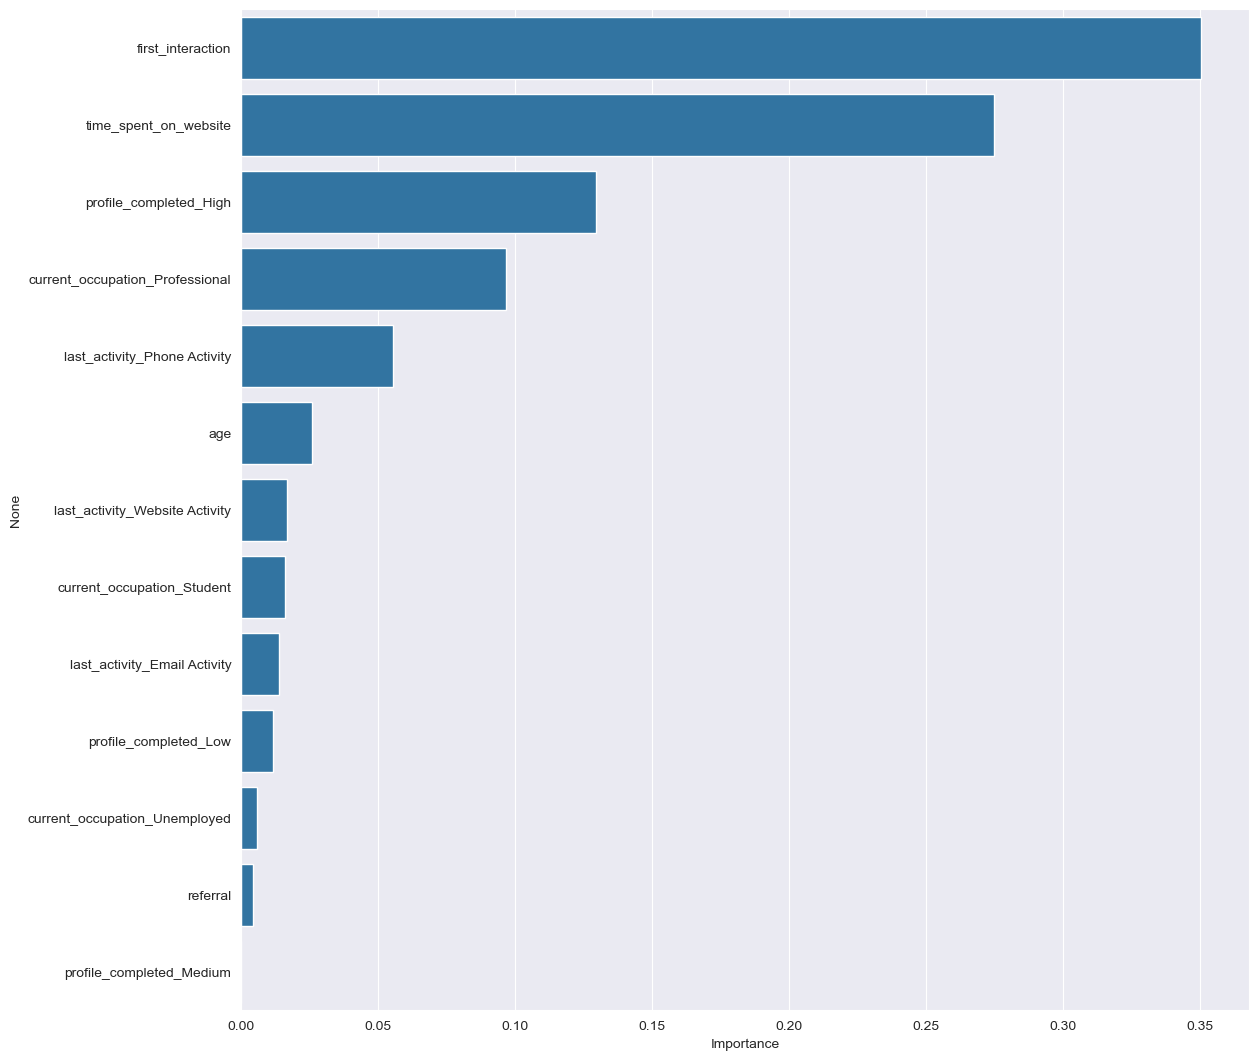

In [297]:
# get the feature importances
rf_importance: np.ndarray = rf_tuned_star.feature_importances_

# get the columns
columns = X.columns

rf_importance_df = pd.DataFrame(rf_importance, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

## Observations

The Random Forest Model has places similar importance on the features compared to the decision tree. However, the Random Forest Model places a slightly more importance on the time spent on website variable than does the Tree. Juxtaposing the two models we can conclude that the First Interaction, amount of time spent on website, high profile completion and working as a professional are indeed the four most important factors to consider when trying to assess the likelihood of converting a lead to a customer.


## Actionable Insights and Recommendations

The decision tree shows that the most important features for determining whether a lead will be converted or not are: 

1.	First interaction via Website
2.	The amount of time the lead has spent on the website
3.	High profile completion 
4.	Working as a professional

More than 50% of the total reduction in impurity is due to the first interaction and the amount of time spent the lead has spent on the website, (35% and 27% respectively). Other important factors include a high profile-completion (13%) and a professional occupation (~10%).

If we follow the paths in the tree to the leaf nodes we can construct the following profile of leads that are most likely to convert: 
1.	Following the path to node 36 – [9, 345]
    - Higher time spent on website
    - First interaction on website
    - Professional Occupation 
    - Last interaction either on Email or Website (Not Phone)
    - High or Medium Profile Completion (Not Low)
2.	Following the path to node 34 – [16, 88]
    - Higher time spent on website above 418 seconds
    - First interaction on website
    - Last interaction either on Email or Website (Not Phone)
    - High Profile Completion
3.	Following the path to node 10 – [59, 155] 
    - High profile completion
    - First interaction on website
    - Professional occupation.
    - Spent  between 347 and 418 seconds on the website.

Node 36 gives the best description of the profile of leads that are converted to paying customers. These customers have spent more than 418 seconds on the website. They are also professionals who first interacted with the company on its website. These leads have last interacted with the company either by email or website (not by phone) and have a high or medium profile completion (Not low). 

Node 34 presents a similar description of leads that are likely to be converted to paying customers. These leads have spent more than 418 seconds on the company website, first interacted with the company through its website, last engaged with the company either through email or website (not Phone). However, these leads have a high profile completion (in contrast to node 36 which also allowed leads with a medium profile completion), and are not professionals. 

Summary Profile and Recommendation: 

To optimize resource allocation the company should focus on leads who:
 
1.	Spent more than 418 seconds on the website; and
2.	First interacted with the company on the website; and
3.	Last interacted with the company through Email or the Company’s website (Not Phone)

These factors are necessary factors for converting a lead to a paying customer. However, they are not sufficient.

In order for the lead to be converted to a paying customer with, one of the following should also hold: 
1.	High Profile Completion
2.	Professional Occupation with at least Medium Profile Completion.

In the absence of these, the company can also check the criterion discovered by node 10, although leads meeting this criteria are less likely to be converted to paying customers.

Clearly the companies website plays a major role in whether leads are converted to paying customers or not. The company should explore the reasons for the relatively poorer conversion rate of leads who first engage with the company through its mobile application.